In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Visualization

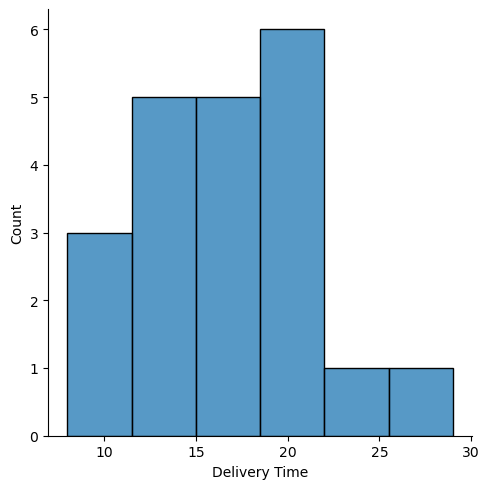

In [5]:
sns.displot(data['Delivery Time'])
plt.show()

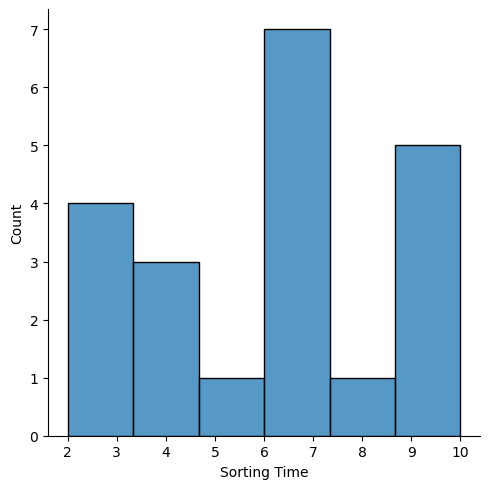

In [6]:
sns.displot(data['Sorting Time'])
plt.show()

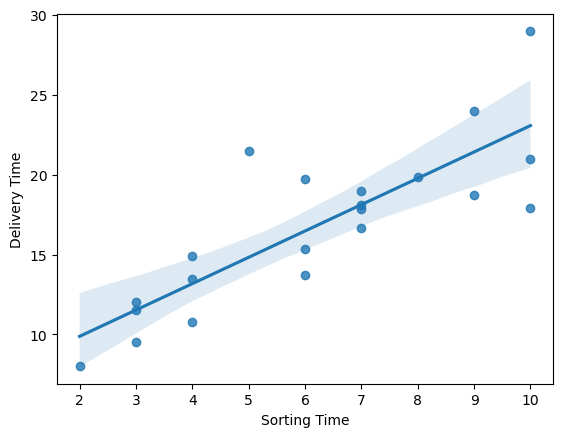

In [7]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])
plt.show()

In [8]:
#renaming columns
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
#correlation analysis
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [10]:
#model building
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [11]:
#model testing
print('Parameters: ',model.params)
print('tvalues: ',model.tvalues,'pvalues: ',model.pvalues)

Parameters:  Intercept       6.582734
sorting_time    1.649020
dtype: float64
tvalues:  Intercept       3.823349
sorting_time    6.387447
dtype: float64 pvalues:  Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [12]:
#Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [13]:
#model predictions
pred_data=pd.Series([1,11])
pred_data

0     1
1    11
dtype: int64

In [14]:
pred_data=pd.DataFrame(pred_data,columns=['sorting_time'])
pred_data

,sorting_time
0,1
1,11


In [15]:
model.predict(pred_data)

0     8.231754
1    24.721953
dtype: float64

LOG TRANSFORMATION

In [16]:
from sklearn.linear_model import LinearRegression

# Extract the independent and dependent variables
sorting_time = data['sorting_time'].values.reshape(-1, 1)
delivery_time = data['delivery_time'].values

# Apply log transformation to both sorting time and delivery time
log_sorting_time = np.log(sorting_time)
log_delivery_time = np.log(delivery_time)

In [17]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(log_sorting_time, log_delivery_time)

LinearRegression()

In [18]:
# Print the model coefficients
print('Intercept:', model.intercept_)
print('Sorting Time coefficient:', model.coef_[0])

# Predict delivery time for a sorting time of 5 hours
log_predicted_delivery_time = model.predict([[np.log(5)]])
predicted_delivery_time = np.exp(log_predicted_delivery_time[0])
print('Predicted delivery time for sorting time of 5 hours:', predicted_delivery_time)

Intercept: 1.7419870888672382
Sorting Time coefficient: 0.5975223286185809
Predicted delivery time for sorting time of 5 hours: 14.934323854146886


In [19]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
predicted_delivery_time = np.exp(model.predict(log_sorting_time))
rmse = np.sqrt(mean_squared_error(delivery_time, predicted_delivery_time))
print('RMSE:', rmse)

RMSE: 2.745828897614549


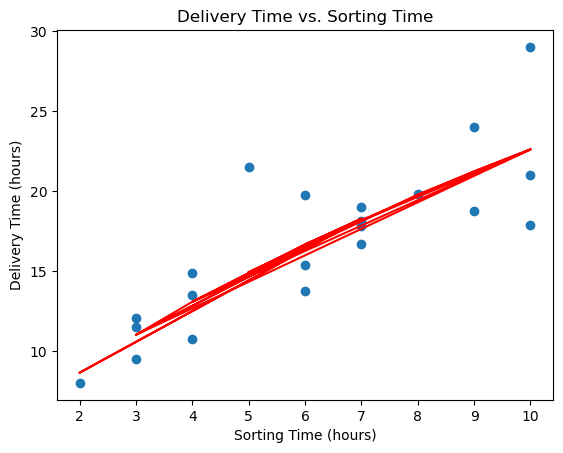

In [20]:
# Visualize the data and the regression line
plt.scatter(sorting_time, delivery_time);
plt.plot(sorting_time, np.exp(model.predict(log_sorting_time)), color='red')
plt.xlabel('Sorting Time (hours)')
plt.ylabel('Delivery Time (hours)')
plt.title('Delivery Time vs. Sorting Time')
plt.show()

# SQRT TRANSFORMATION

In [21]:
# Apply square root transformation to both sorting time and delivery time
sqrt_sorting_time = np.sqrt(sorting_time)
sqrt_delivery_time = np.sqrt(delivery_time)

In [22]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(sqrt_sorting_time, sqrt_delivery_time)

LinearRegression()

In [23]:
# Print the model coefficients
print('Intercept:', model.intercept_)
print('Sorting Time coefficient:', model.coef_[0])

# Predict delivery time for a sorting time of 5 hours
sqrt_predicted_delivery_time = model.predict([[np.sqrt(5)]])
predicted_delivery_time = sqrt_predicted_delivery_time[0] ** 2
print('Predicted delivery time for sorting time of 5 hours:', predicted_delivery_time)

Intercept: 1.6134786707037638
Sorting Time coefficient: 1.0022168824172453
Predicted delivery time for sorting time of 5 hours: 14.857199143243042


In [24]:
# Calculate RMSE
predicted_delivery_time = model.predict(sqrt_sorting_time) ** 2
rmse = np.sqrt(mean_squared_error(delivery_time, predicted_delivery_time))
print('RMSE:', rmse)

RMSE: 2.762294279320867


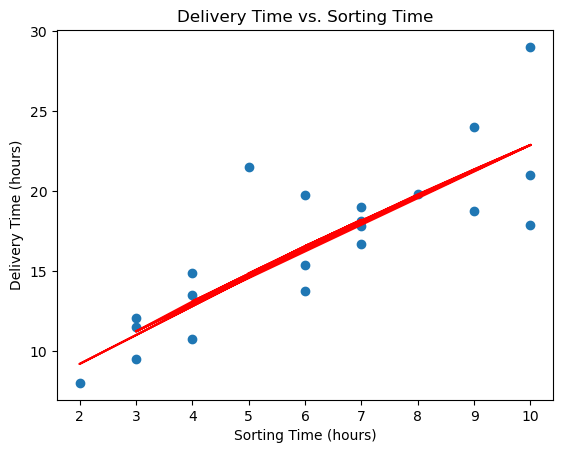

In [25]:
# Visualize the data and the regression line
plt.scatter(sorting_time, delivery_time)
plt.plot(sorting_time, model.predict(sqrt_sorting_time) ** 2, color='red')
plt.xlabel('Sorting Time (hours)')
plt.ylabel('Delivery Time (hours)')
plt.title('Delivery Time vs. Sorting Time')
plt.show()